# Bharat Intern Project No 2-

#  Titanic Classification :
#              Make a system which tells whether the person will be save from sinking. What factors were most likely lead to   success-socio-economic status, age, gender and more.           

In [1]:
import pandas as pdsctre
import numpy as np

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.shape

(891, 12)

In [4]:
test_data.shape

(418, 11)

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# EDA

In [10]:
# survival based on Pclass
train_data[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

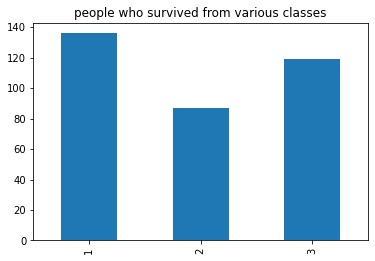

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

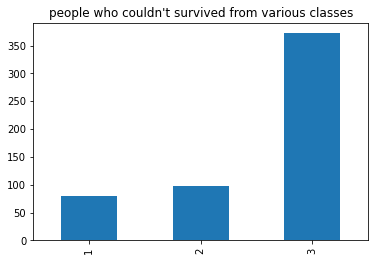

In [11]:
import matplotlib.pyplot
train_data.loc[train_data['Survived']==1,'Pclass'].value_counts().sort_index().plot.bar()
plt.title("people who survived from various classes")
plt.show()

train_data.loc[train_data['Survived']==0,'Pclass'].value_counts().sort_index().plot.bar()
plt.title("people who couldn't survived from various classes")
plt.show()

In [12]:
# Survival Based on Age
train_data[['Age','Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


In [13]:
train_data["Age"].min()

0.42

In [14]:
train_data["Age"].max()

80.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

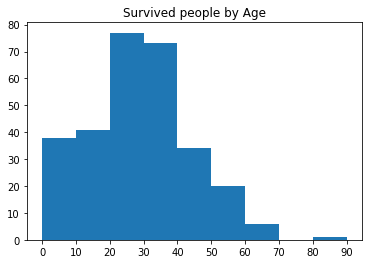

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

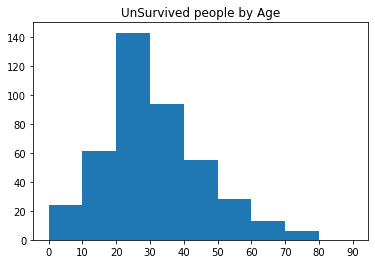

In [15]:
age = train_data.loc[train_data.Survived == 1, 'Age']
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))
plt.title("Survived people by Age")
plt.show()

age = train_data.loc[train_data.Survived == 0, 'Age']
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))
plt.title("UnSurvived people by Age")
plt.show()

In [16]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
print(train_data['Embarked'].value_counts())
train_data[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

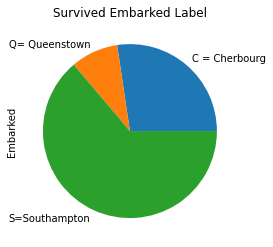

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

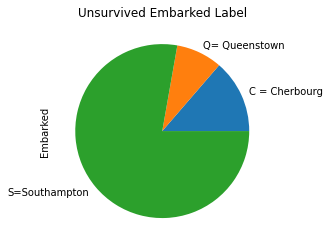

In [18]:
l = ['C = Cherbourg','Q= Queenstown','S=Southampton']
train_data.loc[train_data['Survived']==1,'Embarked'].value_counts().sort_index().plot.pie(labels=l)
plt.title("Survived Embarked Label")
plt.show()

train_data.loc[train_data['Survived']==0,'Embarked'].value_counts().sort_index().plot.pie(labels=l)
plt.title("Unsurvived Embarked Label")
plt.show()

In [19]:
# Feature Selection

In [20]:
# unnecessary columns - Ticket , Cabin , Name

train_data.drop(['Ticket','Cabin','Name'], axis=1, inplace= True)


In [21]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [22]:
# spliting in X & Y
X = train_data[['Age','Pclass','SibSp','Fare','Sex','Embarked']]
Y = train_data['Survived']

In [23]:
# null values
X.isnull().sum()

Age         177
Pclass        0
SibSp         0
Fare          0
Sex           0
Embarked      2
dtype: int64

In [24]:
X['Age']= X['Age'].fillna(X['Age'].median())
print(X.isnull().sum())

Age         0
Pclass      0
SibSp       0
Fare        0
Sex         0
Embarked    2
dtype: int64


C:\Users\user\AppData\Local\Temp/ipykernel_4032/3076558435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age']= X['Age'].fillna(X['Age'].median())


In [25]:
d = {'male': 0,'female':1}
X['Sex'] = X['Sex'].apply(lambda x:d[x])
X['Sex'].head(10)

C:\Users\user\AppData\Local\Temp/ipykernel_4032/3582871455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].apply(lambda x:d[x])


0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Sex, dtype: int64

In [26]:
Embark=[]
for i in X["Embarked"]:
    if i=="S":
        Embark.append(0)
    elif i=="Q":
        Embark.append(1)
    elif i=="C":
        Embark.append(2)
    else:
        Embark.append(3)

In [27]:
X = X.drop(['Embarked'], axis = 1)
X['Embarked'] = Embark

In [28]:
X

,Age,Pclass,SibSp,Fare,Sex,Embarked
0,22.0,3,1,7.2500,0,0
1,38.0,1,1,71.2833,1,2
2,26.0,3,0,7.9250,1,0
3,35.0,1,1,53.1000,1,0
4,35.0,3,0,8.0500,0,0
...,...,...,...,...,...,...
886,27.0,2,0,13.0000,0,0
887,19.0,1,0,30.0000,1,0
888,28.0,3,1,23.4500,1,0
889,26.0,1,0,30.0000,0,2


In [29]:
# model building

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size= 0.3, random_state= 14)

In [31]:
# we will use Logistic Regression model 

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)

In [32]:
#evaluation
from sklearn.metrics import accuracy_score
result = accuracy_score(y_test, y_pred)
print(result*100)

80.22388059701493


# So we made a System which predicts the person will be save from sinking ...... lets try with test data and predict 

In [33]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
test_data = test_data.drop(['Name','Ticket','Cabin'], axis = 1)

In [36]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [37]:
d = {'male': 0,'female':1}
test_data['Sex'] = test_data['Sex'].apply(lambda x:d[x])
X['Sex'].head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Sex, dtype: int64

In [39]:
Embark=[]
for i in test_data["Embarked"]:
    if i=="S":
        Embark.append(0)
    elif i=="Q":
        Embark.append(1)
    elif i=="C":
        Embark.append(2)
    else:
        Embark.append(3)
        
test = test_data.drop(['Embarked'], axis = 1)
test['Embarked'] = Embark

In [40]:
test.drop(['PassengerId','Parch'], axis = 1, inplace = True)

In [41]:
test.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,0,34.5,0,7.8292,1
1,3,1,47.0,1,7.0000,0
2,2,0,62.0,0,9.6875,1
3,3,0,27.0,0,8.6625,0
4,3,1,22.0,1,12.2875,0


In [42]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Fare         1
Embarked     0
dtype: int64

In [43]:
test['Age']= test['Age'].fillna(test['Age'].median())
print(test.isnull().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Fare        1
Embarked    0
dtype: int64


In [44]:
test['Fare']= test['Fare'].fillna(test['Fare'].median())
print(test.isnull().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
Embarked    0
dtype: int64


In [45]:
test.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,0,34.5,0,7.8292,1
1,3,1,47.0,1,7.0000,0
2,2,0,62.0,0,9.6875,1
3,3,0,27.0,0,8.6625,0
4,3,1,22.0,1,12.2875,0


In [46]:
test = test[['Age','Pclass','SibSp','Fare','Sex','Embarked']]

In [47]:
test.head()

,Age,Pclass,SibSp,Fare,Sex,Embarked
0,34.5,3,0,7.8292,0,1
1,47.0,3,1,7.0000,1,0
2,62.0,2,0,9.6875,0,1
3,27.0,3,0,8.6625,0,0
4,22.0,3,1,12.2875,1,0


In [48]:
test_pred = LR.predict(test)

In [49]:
test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

# The main Factors which will lead are Age , Gender and classes of ship 

# Thank You!!